# Loan Default Prediction - Imperial College London

- Refer to 2nd Place Solution for Complete steps. Steps are documented below
- Here training data was split and we did default prediction using GradientBoostingClassifier

https://www.kaggle.com/c/loan-default-prediction/data

## Overview
This competition asks you to determine whether a loan will default, as well as the loss incurred if it does default. Unlike traditional finance-based approaches to this problem, where one distinguishes between good or bad counterparties in a binary way, we seek to anticipate and incorporate both the default and the severity of the losses that result. In doing so, we are building a bridge between traditional banking, where we are looking at reducing the consumption of economic capital, to an asset-management perspective, where we optimize on the risk to the financial investor.

This competition is sponsored by researchers at Imperial College London.

## Data Description

This data corresponds to a set of financial transactions associated with individuals. The data has been standardized, de-trended, and anonymized. You are provided with over two hundred thousand observations and nearly 800 features.  Each observation is independent from the previous. 

For each observation, it was recorded whether a default was triggered. In case of a default, the loss was measured. This quantity lies between 0 and 100. It has been normalised, considering that the notional of each transaction at inception is 100. For example, a loss of 60 means that only 40 is reimbursed. If the loan did not default, the loss was 0. You are asked to predict the losses for each observation in the test set.

Missing feature values have been kept as is, so that the competing teams can really use the maximum data available, implementing a strategy to fill the gaps if desired. Note that some variables may be categorical (e.g. f776 and f777).

The competition sponsor has worked to remove time-dimensionality from the data. However, the observations are still listed in order from old to new in the training set. In the test set they are in random order.



## Functional Terms and Definitions
- **Probability of Default (PD)**
- **Loss Given Default (LGD)**
- **Expected Loss (EL)**
- **Economic Capital (EC)**

## Steps

### Data Load and Preprocess

- 1) load_train_fs : Load Training data
- 2) load_test_fs  : Load Test Data
- 3) train_type    : Process Training data
- 4) test_type	 : Process Test data

### Feature Selection
- 5) getTopFeatures : Get Top 100 Features

### Feature Extraction
- 6) feature_minus_pair_list
- 7) feature_plus_pair_list
- 8) feature_mul_pair_list
- 9) feature_divide_pair_list
- 10) feature_pair_sub_mul_list

- 11) Generate Labels: toLabels()

### Modeling and Evaluation
- 12) Fit Model : GradientBoostingClassifier()
- 13) Predict : gbc_svr_predict2()
- 14) Evaluate: get_evaluation_matrices()

In [144]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [145]:
def get_evaluation_matrices(y_actual, y_predicted, y_pred_prob_pos):
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc

    # Accuracy Score
    print('----------------- Accuracy Score ----------------------------------')
    print('Accuracy Score : ', accuracy_score(y_actual, y_predicted).round(4))

    # Confusion Matrix
    print('\n----------------- Confusion Matrix --------------------------------')
    
    cmx = confusion_matrix(y_actual, y_predicted)
    '''
    f, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title("Confusion Matrix", fontsize=20)
    ax.set_yticks(np.arange(cmx.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels("")
    #ax.set_yticklabels(['Fraudaulant Transaction', 'Valid Transaction'], fontsize=16, rotation=360)
    plt.show()
    '''	
    print(cmx)


    tn = cmx[0,0]  # True  Negative
    fp = cmx[0,1]  # False Positive
    fn = cmx[1,0]  # False Negative
    tp = cmx[1,1]  # True  Positive

    print('\n----------------- TP,FP,TN,FN -------------------------------------')
    print('True  Positive : ', tp)
    print('False Positive : ', fp)
    print('True  Negative : ', tn)
    print('False Negative : ', fn)
    print('Number of Correct Predictions   (TP + TN) : ', tp + tn)
    print('Number of Incorrect Predictions (FP + FN) : ', fp + fn)

    print('\n----------------- Precision/Recall/F1-Score -----------------------')
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print('Precision          : ', precision.round(4))
    print('Recall/Sensitivity : ', recall.round(4))
    print('F1 Score           : ', f1_score.round(4))


    # Classification Report
    print('\n----------------- Classification Report ---------------------------')
    print(classification_report(y_actual, y_predicted))

    
    #### ROC Curve
    print('\n----------------- ROC Curve ---------------------------------------')
    '''
    - Every prediction the classifier makes has an associated probability.
    - Default probability threshold in scikit-learn is 50%
    - By default if the probability is 
        - more than 50%, then the will predict the data point belonging to positive class.
        - less than 50%, then the will predict the data point belonging to negative class.
    '''

    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(y_actual, y_pred_prob_pos)

    # Plot the ROC curve
    plt.plot(fpr,tpr);
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], "k--")
    plt.show()

    print('\n----------------- ROC AUC Score -----------------------------------')
    # Print the AUC
    print('ROC AUC Score : ', roc_auc_score(y_actual,y_pred_prob_pos).round(4))

### Misc

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
import re
import math
import collections
import numpy as np
import time
import operator
from scipy.io import mmread, mmwrite
from random import randint
#from sklearn import cross_validation #AP
from sklearn import linear_model
#from sklearn.grid_search import GridSearchCV #AP
from sklearn import preprocessing as pp
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import  RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.decomposition import ProbabilisticPCA, KernelPCA #AP
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
import scipy.stats as stats
from sklearn import tree
from sklearn.feature_selection import f_regression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, f1_score
#from sklearn.gaussian_process import GaussianProcess
#import features

# working directory
#dir = '.' # AP
#cwd = os.getcwd() #AP
#dir = os.path.dirname(cwd) #AP

label_index = 770

In [148]:
# load train data
def load_train_fs():
    # In the validation process, the training data was randomly shuffled firstly.
    # For the prediction process, there is no need to shuffle the dataset.
    # Owing to out of memory problem, Gaussian process only use part of training data, the prediction of gaussian process
    # may be a little different from the model,which the training data was shuffled.
    train_fs = np.genfromtxt(open(dir + '/train_v2.csv', 'rb'), delimiter=',', skip_header=1)
    col_mean = stats.nanmean(train_fs, axis=0)
    inds = np.where(np.isnan(train_fs))
    train_fs[inds] = np.take(col_mean, inds[1])
    train_fs[np.isinf(train_fs)] = 0
    return train_fs

In [149]:
# load test data
def load_test_fs():
    test_fs = np.genfromtxt(open(dir + '/test_v2.csv', 'rb'), delimiter=',', skip_header=1)
    col_mean = stats.nanmean(test_fs, axis=0)
    inds = np.where(np.isnan(test_fs))
    test_fs[inds] = np.take(col_mean, inds[1])
    test_fs[np.isinf(test_fs)] = 0
    return test_fs

In [150]:
# extract features from test data
def test_type(test_fs):
    x_Test = test_fs[:, range(1, label_index)]
    return x_Test

In [151]:
# extract features from train data
def train_type(train_fs):
    train_x = train_fs[:, range(1, label_index)]
    train_y = train_fs[:, -1]
    return train_x, train_y

In [152]:
# transform the loss to the binary form
def toLabels(train_y):
    labels = np.zeros(len(train_y))
    labels[train_y > 0] = 1
    return labels

In [153]:
# generate the output file based to the predictions
def output_preds(preds):
    out_file = dir + '/output.csv'
    fs = open(out_file, 'w')
    fs.write('id,loss\n')
    for i in range(len(preds)):
        if preds[i] > 100:
            preds[i] = 100
        elif preds[i] < 0:
            preds[i] = 0
        strs = str(i + 105472) + ',' + str(np.float(preds[i]))
        fs.write(strs + '\n');
    fs.close()
    return

In [154]:
# get the top feature indexes by invoking f_regression 
def getTopFeatures(train_x, train_y, n_features=100):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs

In [155]:
# generate the new data, based on which features are generated, and used
def get_data(train_x, feature_indexs, feature_minus_pair_list=[], feature_plus_pair_list=[],
            feature_mul_pair_list=[], feature_divide_pair_list = [], feature_pair_sub_mul_list=[],
            feature_pair_plus_mul_list = [],feature_pair_sub_divide_list = [], feature_minus2_pair_list = [],feature_mul2_pair_list=[], 
            feature_sub_square_pair_list=[], feature_square_sub_pair_list=[],feature_square_plus_pair_list=[]):
    sub_train_x = train_x[:,feature_indexs]
    
    print('feature_minus_pair_list')
    for i in range(len(feature_minus_pair_list)):
        ind_i = feature_minus_pair_list[i][0]
        ind_j = feature_minus_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x[:,ind_i]-train_x[:,ind_j]))
    
    print('feature_plus_pair_list')
    for i in range(len(feature_plus_pair_list)):
        ind_i = feature_plus_pair_list[i][0]
        ind_j = feature_plus_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x[:,ind_i] + train_x[:,ind_j]))
    
    print('feature_mul_pair_list')
    for i in range(len(feature_mul_pair_list)):
        ind_i = feature_mul_pair_list[i][0]
        ind_j = feature_mul_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x[:,ind_i] * train_x[:,ind_j]))
    
    print('feature_divide_pair_list')
    for i in range(len(feature_divide_pair_list)):
        ind_i = feature_divide_pair_list[i][0]
        ind_j = feature_divide_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x[:,ind_i] / train_x[:,ind_j]))
    
    print('feature_pair_sub_mul_list')
    for i in range(len(feature_pair_sub_mul_list)):
        ind_i = feature_pair_sub_mul_list[i][0]
        ind_j = feature_pair_sub_mul_list[i][1]
        ind_k = feature_pair_sub_mul_list[i][2]
        sub_train_x = np.column_stack((sub_train_x, (train_x[:,ind_i]-train_x[:,ind_j]) * train_x[:,ind_k]))
        
    return sub_train_x

In [185]:
# use gbm classifier to predict whether the loan defaults or not
def gbc_classify(train_x, train_y):
    feature_indexs = getTopFeatures(train_x, train_y)
    sub_x_Train = get_data(train_x, feature_indexs[:16], features.feature_pair_sub_list
                ,features.feature_pair_plus_list, features.feature_pair_mul_list, features.feature_pair_divide_list[:20],
                features.feature_pair_sub_mul_list[:20])
    labels = toLabels(train_y)
    gbc = GradientBoostingClassifier(n_estimators=3000, max_depth=8)
    gbc.fit(sub_x_Train, labels)
    return gbc

In [157]:
# use svm to predict the loss, based on the result of gbm classifier
def gbc_svr_predict_part(gbc, train_x, train_y, test_x, feature_pair_sub_list,
                         feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list,
                         feature_pair_sub_mul_list, feature_pair_sub_list_sf, feature_pair_plus_list2):
    feature_indexs = getTopFeatures(train_x, train_y)
    sub_x_Train = get_data(train_x, feature_indexs[:16], feature_pair_sub_list
                           , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20],
                           feature_pair_sub_mul_list[:20])
    sub_x_Test = get_data(test_x, feature_indexs[:16], feature_pair_sub_list
                          , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20],
                          feature_pair_sub_mul_list[:20])
    pred_labels = gbc.predict(sub_x_Test)

    pred_probs = gbc.predict_proba(sub_x_Test)[:, 1]

    ind_test = np.where(pred_probs > 0.55)[0]

    ind_train = np.where(train_y > 0)[0]
    ind_train0 = np.where(train_y == 0)[0]

    preds_all = np.zeros([len(sub_x_Test)])

    flag = (sub_x_Test[:, 16] >= 1)
    ind_tmp0 = np.where(flag)[0]

    ind_tmp = np.where(~flag)[0]

    sub_x_Train = get_data(train_x, feature_indexs[:100], feature_pair_sub_list_sf
                           , feature_pair_plus_list2[:100], feature_pair_mul_list[:40], feature_pair_divide_list,
                           feature_pair_sub_mul_list)
    sub_x_Test = get_data(test_x, feature_indexs[:100], feature_pair_sub_list_sf
                          , feature_pair_plus_list2[:100], feature_pair_mul_list[:40], feature_pair_divide_list,
                          feature_pair_sub_mul_list)
    sub_x_Train[:, 101] = np.log(1 - sub_x_Train[:, 101])
    sub_x_Test[ind_tmp, 101] = np.log(1 - sub_x_Test[ind_tmp, 101])
    scaler = pp.StandardScaler()
    scaler.fit(sub_x_Train)
    sub_x_Train = scaler.transform(sub_x_Train)
    sub_x_Test[ind_tmp] = scaler.transform(sub_x_Test[ind_tmp])

    svr = SVR(C=16, kernel='rbf', gamma=0.000122)

    svr.fit(sub_x_Train[ind_train], np.log(train_y[ind_train]))
    preds = svr.predict(sub_x_Test[ind_test])
    preds_all[ind_test] = np.power(np.e, preds)
    preds_all[ind_tmp0] = 0
    return preds_all

In [195]:
def gbc_predict_part(gbc, train_x, train_y, test_x, feature_pair_sub_list,
                          feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list,
                          feature_pair_sub_mul_list, feature_pair_sub_list_sf, feature_pair_plus_list2):
    feature_indexs = getTopFeatures(train_x, train_y)
    sub_x_Train = get_data(train_x, feature_indexs[:16], feature_pair_sub_list
                           , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20],
                           feature_pair_sub_mul_list[:20])
    sub_x_Test = get_data(test_x, feature_indexs[:16], feature_pair_sub_list
                          , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20],
                          feature_pair_sub_mul_list[:20])
    pred_labels = gbc.predict(sub_x_Test)

    pred_probs = gbc.predict_proba(sub_x_Test)[:, 1]

    return pred_labels, pred_probs

In [159]:
# use gbm regression to predict the loss, based on the result of gbm classifier
def gbc_gbr_predict_part(gbc, train_x, train_y, test_x, feature_pair_sub_list,
                         feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list,
                         feature_pair_sub_mul_list, feature_pair_sub_list2):
    feature_indexs = getTopFeatures(train_x, train_y)
    sub_x_Train = get_data(train_x, feature_indexs[:16], feature_pair_sub_list
                           , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20],
                           feature_pair_sub_mul_list[:20])
    sub_x_Test = get_data(test_x, feature_indexs[:16], feature_pair_sub_list
                          , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20],
                          feature_pair_sub_mul_list[:20])
    pred_labels = gbc.predict(sub_x_Test)

    pred_probs = gbc.predict_proba(sub_x_Test)[:, 1]

    ind_test = np.where(pred_probs > 0.55)[0]

    ind_train = np.where(train_y > 0)[0]
    ind_train0 = np.where(train_y == 0)[0]

    preds_all = np.zeros([len(sub_x_Test)])

    flag = (sub_x_Test[:, 16] >= 1)
    ind_tmp0 = np.where(flag)[0]

    ind_tmp = np.where(~flag)[0]

    sub_x_Train = get_data(train_x, feature_indexs[:16], feature_pair_sub_list2[:70]
                           , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list,
                           feature_pair_sub_mul_list)
    sub_x_Test = get_data(test_x, feature_indexs[:16], feature_pair_sub_list2[:70]
                          , feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list,
                          feature_pair_sub_mul_list)

    scaler = pp.StandardScaler()
    scaler.fit(sub_x_Train)
    sub_x_Train = scaler.transform(sub_x_Train)
    sub_x_Test[ind_tmp] = scaler.transform(sub_x_Test[ind_tmp])

    gbr1000 = GradientBoostingRegressor(n_estimators=1300, max_depth=4, subsample=0.5, learning_rate=0.05)

    gbr1000.fit(sub_x_Train[ind_train], np.log(train_y[ind_train]))
    preds = gbr1000.predict(sub_x_Test[ind_test])
    preds_all[ind_test] = np.power(np.e, preds)
    preds_all[ind_tmp0] = 0
    return preds_all

In [160]:
# predict the loss based on the Gaussian process regressor, which has been trained
def gp_predict(clf, x_Test):
    size = len(x_Test)
    part_size = 3000
    cnt = (size - 1) / part_size + 1
    preds = []
    for i in range(cnt):
        if i < cnt - 1:
            pred_part = clf.predict(x_Test[i * part_size: (i + 1) * part_size])
        else:
            pred_part = clf.predict(x_Test[i * part_size: size])
        preds.extend(pred_part)
    return np.power(np.e, preds)

In [161]:
# train the gaussian process regressor
def gbc_gp_predict_part(sub_x_Train, train_y, sub_x_Test_part):
    # Owing to out of memory, the model was trained by part of training data
    # Attention, this part was trained on the ram of more than 96G
    sub_x_Train[:, 16] = np.log(1 - sub_x_Train[:, 16])
    scaler = pp.StandardScaler()
    scaler.fit(sub_x_Train)
    sub_x_Train = scaler.transform(sub_x_Train)
    ind_train = np.where(train_y > 0)[0]
    part_size = int(0.7 * len(ind_train))
    gp = GaussianProcess(theta0=1e-3, thetaL=1e-5, thetaU=10, corr='absolute_exponential')
    gp.fit(sub_x_Train[ind_train[:part_size]], np.log(train_y[ind_train[:part_size]]))
    flag = (sub_x_Test_part[:, 16] >= 1)
    ind_tmp0 = np.where(flag)[0]
    ind_tmp = np.where(~flag)[0]
    sub_x_Test_part[ind_tmp, 16] = np.log(1 - sub_x_Test_part[ind_tmp, 16])
    sub_x_Test_part[ind_tmp] = scaler.transform(sub_x_Test_part[ind_tmp])
    gp_preds_tmp = gp_predict(gp, sub_x_Test_part[ind_tmp])
    gp_preds = np.zeros(len(sub_x_Test_part))
    gp_preds[ind_tmp] = gp_preds_tmp
    return gp_preds

In [162]:
# use gbm classifier to predict whether the loan defaults or not, then invoke the function gbc_gp_predict_part
def gbc_gp_predict(train_x, train_y, test_x):
    feature_indexs = getTopFeatures(train_x, train_y)
    sub_x_Train = get_data(train_x, feature_indexs[:16], features.feature_pair_sub_list
                           , features.feature_pair_plus_list, features.feature_pair_mul_list,
                           features.feature_pair_divide_list[:20])
    sub_x_Test = get_data(test_x, feature_indexs[:16], features.feature_pair_sub_list
                          , features.feature_pair_plus_list, features.feature_pair_mul_list,
                          features.feature_pair_divide_list[:20])
    labels = toLabels(train_y)
    gbc = GradientBoostingClassifier(n_estimators=3000, max_depth=9)
    gbc.fit(sub_x_Train, labels)
    pred_probs = gbc.predict_proba(sub_x_Test)[:, 1]
    ind_test = np.where(pred_probs > 0.55)[0]
    gp_preds_part = gbc_gp_predict_part(sub_x_Train, train_y, sub_x_Test[ind_test])
    gp_preds = np.zeros(len(test_x))
    gp_preds[ind_test] = gp_preds_part
    return gp_preds

In [194]:
# invoke the function gbc_svr_predict_part
def gbc_svr_predict(gbc, train_x, train_y, test_x):
    svr_preds = gbc_svr_predict_part(gbc, train_x, train_y, test_x, features.feature_pair_sub_list,
                                     features.feature_pair_plus_list,
                                     features.feature_pair_mul_list, features.feature_pair_divide_list,
                                     features.feature_pair_sub_mul_list, features.feature_pair_sub_list_sf,
                                     features.feature_pair_plus_list2)
    return svr_preds


def gbc_svr_predict2(gbc, train_x, train_y, test_x):
    pred_labels, pred_probs = gbc_svr_predict_part2(gbc, train_x, train_y, test_x, features.feature_pair_sub_list,
                                                    features.feature_pair_plus_list,
                                                    features.feature_pair_mul_list, features.feature_pair_divide_list,
                                                    features.feature_pair_sub_mul_list,
                                                    features.feature_pair_sub_list_sf,
                                                    features.feature_pair_plus_list2)
    return pred_labels, pred_probs

In [164]:
# invoke the function gbc_gbr_predict_part
def gbc_gbr_predict(gbc, train_x, train_y, test_x):
    gbr_preds = gbc_gbr_predict_part(gbc, train_x, train_y, test_x, features.feature_pair_sub_list,
                                     features.feature_pair_plus_list, features.feature_pair_mul_list,
                                     features.feature_pair_divide_list, features.feature_pair_sub_mul_list,
                                     features.feature_pair_sub_list2)
    return gbr_preds

In [188]:
class features:
    import scipy.stats as stats
    import random

    feature_pair_sub_list = [[520, 521], [271, 521], [271, 520], [67, 466], [623, 664], [7, 536], [66, 529], [531, 532], [561, 562], [248, 602], [570, 571], [218, 766], [64, 765], [208, 590], [423, 660], [312, 463], [290, 592], [621, 755], [52, 311], [65, 422], [350, 656], [278, 420], [320, 633], [507, 761], [0, 341], [139, 665], [10, 724], [53, 319], [367, 698], [279, 421], [9, 358], [48, 287], [375, 653], [397, 728], [197, 666], [38, 295], [402, 758], [403, 757], [549, 584], [238, 258], [296, 526], [586, 607], [291, 591], [62, 289], [16, 288], [581, 589], [8, 380], [655, 683], [58, 582]]
    feature_pair_plus_list = [[466, 529], [664, 759], [602, 766], [64, 665], [279, 590], [397, 592], [311, 621], [248, 755], [660, 768], [218, 666], [65, 278], [549, 607], [16, 402], [53, 757], [463, 526], [197, 312], [507, 762], [320, 619], [367, 380], [10, 350], [62, 401], [52, 756], [610, 633], [0, 656], [319, 758], [38, 50], [288, 296], [67, 584], [48, 611], [422, 724], [249, 591], [58, 686], [287, 295], [341, 589], [208, 728], [66, 508], [44, 605], [4, 358], [9, 695]]
    feature_pair_mul_list = [[466, 529], [621, 664], [159, 626], [599, 602], [213, 607], [209, 218], [433, 463], [16, 665], [619, 766], [158, 625], [558, 605], [64, 248], [402, 660], [583, 606], [53, 279], [595, 596], [367, 590], [592, 633], [52, 278], [65, 350], [10, 38], [526, 644], [42, 397], [23, 666], [401, 758], [67, 73], [54, 589], [507, 549], [358, 591], [423, 610], [250, 312], [311, 755], [66, 353], [611, 732], [645, 765], [1, 320], [88, 341], [319, 757], [286, 296], [375, 403], [48, 509], [203, 581], [422, 655], [62, 87], [283, 622], [627, 724], [258, 686], [168, 268], [0, 197], [282, 646], [420, 656]]
    feature_pair_divide_list = [[712, 664], [466, 726], [463, 6], [539, 529], [602, 507], [660, 653], [64, 208], [766, 630], [590, 197], [592, 0], [100, 145], [218, 3], [65, 9], [526, 525], [607, 643], [410, 647], [610, 144], [420, 278], [311, 10], [1, 279], [468, 462], [472, 444], [248, 652], [665, 510], [583, 143], [621, 59], [656, 52], [397, 509], [196, 700], [403, 401], [655, 54], [350, 518], [312, 672], [619, 615], [591, 187], [675, 671], [666, 157], [341, 8], [367, 217], [445, 402], [67, 637], [375, 654], [379, 716], [754, 549], [320, 517], [599, 596], [589, 267], [673, 718], [422, 400], [620, 386], [680, 719], [755, 28], [765, 383], [674, 721], [358, 717], [676, 720], [66, 167], [633, 347], [681, 71]]
    feature_pair_sub_mul_list=[[271, 521, 1], [520, 521, 622], [7, 536, 218], [656, 664, 619], [664, 712, 621], [664, 719, 278], [664, 731, 401], [67, 466, 529], [466, 726, 65], [466, 754, 591], [664, 671, 402], [71, 664, 403], [342, 664, 280], [351, 664, 421], [623, 664, 666], [359, 664, 440], [368, 664, 510], [376, 664, 279], [414, 664, 420], [466, 539, 589], [424, 664, 665], [33, 664, 397], [466, 559, 10], [405, 664, 422], [664, 760, 439], [39, 664, 509], [55, 664, 620], [49, 664, 672], [66, 466, 549], [634, 664, 141], [267, 466, 433], [664, 703, 328], [60, 466, 64], [386, 664, 399], [38, 466, 633], [128, 466, 590], [615, 664, 511], [44, 466, 58], [107, 466, 157], [62, 466, 48], [7, 546, 248], [314, 507, 466], [531, 532, 209], [59, 664, 70], [126, 466, 367], [45, 664, 197], [246, 466, 118], [7, 556, 607], [117, 466, 592], [265, 466, 350], [97, 466, 156], [664, 702, 88], [7, 566, 258], [53, 466, 52], [215, 766, 466], [466, 584, 108], [236, 466, 72], [116, 466, 358], [61, 466, 56], [664, 704, 87], [311, 466, 28], [176, 466, 206], [29, 466, 631], [255, 466, 341], [247, 466, 0], [260, 466, 245], [664, 708, 98], [664, 696, 447], [664, 701, 601], [256, 466, 337], [664, 751, 431], [43, 466, 42], [46, 466, 36], [466, 602, 438], [40, 466, 717], [106, 466, 226], [319, 466, 758], [664, 697, 432], [410, 466, 686], [466, 741, 8], [250, 466, 235], [664, 693, 74], [86, 466, 630], [664, 752, 166], [18, 466, 632], [561, 562, 64], [313, 466, 54], [466, 746, 210], [466, 635, 9], [19, 466, 57], [63, 466, 517], [11, 466, 37], [237, 466, 216], [14, 466, 365], [664, 738, 127], [12, 466, 506], [96, 466, 338], [664, 709, 167], [326, 466, 764], [121, 466, 382], [47, 466, 15], [320, 466, 16], [664, 747, 227], [257, 466, 659], [186, 466, 139], [77, 529, 463], [321, 466, 375], [177, 466, 147], [187, 466, 217], [185, 466, 195], [294, 466, 660], [312, 466, 23], [664, 698, 225], [7, 575, 605], [266, 466, 650], [318, 466, 651], [664, 710, 599], [664, 739, 240], [17, 466, 348], [466, 582, 276], [664, 700, 441], [664, 694, 230], [404, 664, 393], [664, 748, 515], [570, 571, 64], [466, 767, 380], [287, 466, 356], [466, 706, 196], [295, 466, 339], [664, 740, 670], [664, 711, 627], [111, 466, 78], [50, 466, 654], [445, 466, 146], [448, 602, 768], [664, 699, 753], [664, 749, 277], [296, 466, 723], [406, 664, 394], [664, 695, 518], [188, 466, 190], [466, 587, 735], [466, 750, 285], [286, 466, 759], [664, 742, 220], [289, 466, 643], [165, 466, 366], [407, 664, 392], [155, 466, 21], [288, 466, 349], [109, 466, 175], [664, 743, 661], [664, 737, 207], [30, 607, 213], [664, 761, 3], [259, 466, 249], [178, 466, 373], [81, 466, 652], [322, 664, 101], [323, 664, 137], [238, 466, 27], [324, 664, 428], [325, 664, 91], [180, 466, 25], [68, 466, 653], [430, 466, 646], [79, 466, 357], [140, 664, 396], [327, 602, 745], [302, 466, 340], [31, 607, 558], [315, 664, 644], [32, 607, 214], [34, 607, 241], [35, 607, 242], [607, 668, 243], [607, 690, 244], [607, 691, 551], [607, 692, 552], [664, 730, 669], [310, 602, 655], [408, 664, 395], [297, 466, 26], [2, 602, 744], [526, 602, 757], [100, 602, 755], [160, 466, 24], [610, 766, 208], [189, 466, 170], [179, 466, 150], [316, 664, 138], [586, 607, 624], [317, 664, 614], [119, 602, 763], [526, 765, 645], [149, 466, 73], [99, 602, 756], [229, 602, 762], [110, 466, 400], [370, 664, 5], [602, 736, 732], [455, 463, 612], [664, 667, 270], [120, 602, 682], [466, 502, 595], [148, 466, 374], [228, 602, 681], [305, 602, 718], [611, 766, 516], [423, 660, 4], [89, 602, 369], [219, 602, 678], [239, 466, 715], [472, 602, 657], [168, 766, 353], [80, 466, 385], [158, 466, 22], [303, 602, 679], [90, 602, 720], [169, 602, 647], [664, 724, 362], [281, 660, 347], [159, 602, 680], [290, 664, 398], [492, 602, 683], [291, 664, 613], [292, 664, 20], [583, 602, 721], [293, 664, 384], [298, 664, 629], [508, 602, 675], [602, 606, 299], [602, 603, 300], [585, 602, 301], [463, 482, 381], [602, 714, 282], [304, 602, 360], [602, 713, 676], [588, 602, 673], [664, 728, 383], [568, 660, 538], [425, 660, 372], [221, 660, 222], [223, 660, 224], [572, 660, 577], [541, 660, 533], [542, 660, 251], [231, 660, 252], [232, 660, 253], [233, 660, 254], [234, 660, 261], [594, 602, 677], [593, 602, 722], [64, 364, 268], [306, 664, 355], [663, 664, 618], [563, 660, 553], [409, 466, 307], [450, 660, 13], [308, 664, 389], [345, 664, 729], [548, 660, 262], [474, 660, 346], [468, 660, 442], [82, 660, 628], [92, 660, 444], [309, 664, 637], [449, 660, 51], [93, 660, 462], [94, 660, 471], [487, 660, 596], [83, 660, 443], [486, 660, 598], [95, 660, 436], [84, 660, 597], [85, 660, 6], [608, 664, 275], [477, 660, 361], [484, 660, 454], [478, 660, 481], [496, 660, 491], [497, 660, 501], [102, 660, 263], [103, 660, 264], [104, 660, 75], [105, 660, 434], [724, 727, 642], [476, 660, 636], [112, 660, 354], [457, 660, 498], [113, 660, 363]]
    feature_pair_sub_list2=[[520, 521], [271, 521], [271, 520], [67, 466], [623, 664], [7, 536], [66, 529], [531, 532], [561, 562], [248, 602], [570, 571], [218, 766], [64, 765], [208, 590], [423, 660], [312, 463], [290, 592], [621, 755], [52, 311], [65, 422], [350, 656], [278, 420], [320, 633], [507, 761], [0, 341], [139, 665], [10, 724], [53, 319], [367, 698], [279, 421], [9, 358], [48, 287], [375, 653], [397, 728], [197, 666], [38, 295], [402, 758], [403, 757], [549, 584], [238, 258], [296, 526], [586, 607], [291, 591], [62, 289], [16, 288], [581, 589], [8, 380], [655, 683], [58, 582], [54, 587], [377, 657], [44, 81], [292, 735], [610, 706], [177, 401], [109, 249], [187, 756], [425, 768], [293, 723], [61, 631], [365, 730], [378, 658], [100, 239], [37, 47], [12, 632], [313, 318], [541, 542], [268, 718], [36, 46], [28, 700], [306, 763], [79, 611], [361, 722], [727, 762], [11, 506], [588, 686], [99, 267], [360, 721], [717, 759], [431, 432], [679, 720], [508, 605], [282, 391], [285, 745], [23, 519], [445, 599], [379, 716], [250, 255], [176, 326], [4, 314], [348, 671], [110, 229], [166, 167], [15, 29], [230, 235], [585, 764], [198, 283], [157, 650], [219, 767], [307, 744], [308, 315], [309, 316], [400, 743], [496, 497], [455, 472], [317, 669], [413, 689], [87, 128], [196, 327], [281, 356], [488, 498], [92, 102], [93, 103], [94, 104], [95, 105], [410, 736], [257, 266], [373, 652], [642, 732], [228, 441], [17, 137], [42, 179], [704, 712], [719, 751], [107, 305], [408, 622], [88, 118], [731, 752], [220, 265], [3, 200], [71, 339], [56, 178], [82, 484], [494, 504], [212, 516], [342, 697], [351, 404], [353, 370], [13, 132], [337, 619], [628, 742], [359, 702], [368, 709], [651, 737], [376, 708], [414, 638], [424, 710], [240, 245], [33, 406], [405, 693], [637, 760], [385, 614], [39, 73], [55, 711], [49, 407], [286, 634], [346, 371], [389, 618], [160, 195], [259, 749], [45, 59], [645, 646], [502, 699], [40, 635], [492, 695], [347, 740], [274, 464], [111, 175], [215, 386], [149, 190], [615, 629], [272, 461], [146, 748], [449, 450], [338, 703], [430, 739], [310, 747], [459, 499], [18, 19], [277, 694], [476, 477], [148, 150], [302, 322], [323, 382], [14, 324], [57, 325], [517, 738], [43, 701], [336, 418], [465, 489], [138, 276], [83, 468], [448, 696], [205, 426], [294, 298], [299, 753], [300, 511], [127, 301], [144, 214], [204, 467], [608, 609], [170, 741], [143, 734], [133, 398], [191, 675], [192, 680], [269, 284], [237, 256], [80, 155], [193, 678], [194, 673], [130, 676], [21, 543], [134, 202], [142, 681], [662, 663], [363, 667], [135, 273], [331, 332], [674, 677], [112, 474], [199, 682], [275, 412], [168, 217], [345, 362], [460, 470], [171, 563], [490, 500], [247, 559], [172, 548], [366, 558], [173, 231], [174, 232], [270, 411], [181, 514], [161, 233], [162, 234], [169, 189], [343, 352], [211, 213], [84, 486], [344, 687], [85, 487], [182, 369], [163, 568], [164, 572], [512, 513], [183, 577], [349, 533], [612, 684], [184, 525], [151, 546], [152, 556], [153, 566], [154, 575], [27, 553], [446, 705], [384, 613], [515, 729], [5, 644], [25, 451], [86, 225], [241, 357], [221, 251], [222, 252], [223, 253], [224, 254], [493, 503], [552, 672], [26, 242], [180, 216], [523, 535], [243, 340], [24, 244], [261, 538], [89, 90], [262, 374], [263, 630], [264, 715], [428, 551], [117, 156], [201, 524], [51, 433], [60, 419], [522, 528], [647, 670], [627, 733], [131, 544], [534, 564], [434, 596], [545, 555], [78, 573], [77, 554], [185, 364], [136, 520], [495, 505], [435, 597], [2, 390], [113, 457], [120, 478], [114, 594], [115, 321], [603, 604], [260, 565], [303, 574], [547, 595], [209, 392], [396, 557], [537, 567], [576, 639], [41, 560], [165, 518], [297, 550], [96, 121], [122, 482], [119, 123], [91, 124], [116, 125], [437, 600], [569, 578], [30, 415], [746, 750], [76, 443], [393, 643], [453, 469], [456, 483], [442, 725], [74, 438], [203, 527], [479, 480], [98, 540], [458, 485], [141, 661], [31, 236], [394, 620], [32, 640], [473, 475], [34, 354], [452, 462], [713, 714], [72, 330], [659, 726], [580, 648], [75, 707], [35, 427], [329, 754], [97, 108], [186, 668], [395, 399], [6, 471], [246, 690], [510, 593], [101, 444], [439, 691], [20, 688], [454, 692], [106, 481], [147, 491], [126, 501], [436, 583], [416, 530], [226, 227], [598, 606], [383, 685], [50, 69], [509, 539], [328, 624], [68, 654], [158, 159], [63, 641], [304, 372], [355, 649], [280, 636], [188, 333], [625, 626], [1, 417], [206, 440], [22, 387], [129, 429], [334, 381], [70, 616], [145, 335], [140, 210]]
    feature_pair_plus_list2=[[466, 529], [664, 759], [602, 766], [64, 665], [279, 590], [397, 592], [311, 621], [248, 755], [660, 768], [218, 666], [65, 278], [549, 607], [16, 402], [53, 757], [463, 526], [197, 312], [507, 762], [320, 619], [367, 380], [10, 350], [62, 401], [52, 756], [610, 633], [0, 656], [319, 758], [38, 50], [288, 296], [67, 584], [48, 611], [422, 724], [249, 591], [58, 686], [287, 295], [341, 589], [208, 728], [66, 508], [44, 605], [4, 358], [9, 695], [54, 99], [100, 258], [425, 577], [3, 655], [581, 765], [8, 694], [519, 658], [267, 582], [587, 706], [290, 420], [717, 730], [282, 561], [177, 238], [36, 326], [727, 763], [423, 543], [599, 631], [283, 657], [516, 689], [235, 764], [109, 187], [291, 608], [137, 767], [51, 292], [214, 721], [293, 346], [200, 268], [157, 289], [219, 229], [623, 653], [281, 533], [570, 732], [138, 745], [314, 667], [663, 761], [315, 421], [375, 400], [565, 722], [228, 305], [514, 718], [79, 176], [316, 510], [280, 317], [212, 720], [652, 671], [110, 441], [313, 403], [41, 744], [284, 465], [251, 646], [175, 632], [209, 743], [179, 196], [390, 712], [364, 622], [28, 723], [506, 650], [37, 195], [571, 683], [211, 426], [42, 170], [132, 677], [640, 742], [71, 643], [662, 737], [472, 736], [682, 705], [265, 559], [5, 332], [525, 680], [536, 678], [546, 675], [69, 342], [15, 318], [56, 255], [556, 673], [641, 719], [545, 716], [700, 729], [298, 609], [669, 735], [299, 410], [80, 239], [459, 734], [300, 354], [141, 749], [440, 731], [377, 513], [107, 121], [351, 419], [140, 359], [368, 439], [376, 509], [372, 414], [381, 424], [33, 217], [405, 518], [636, 760], [46, 150], [461, 578], [216, 257], [39, 445], [55, 139], [49, 399], [620, 634], [149, 156], [74, 699], [133, 547], [604, 740], [460, 687], [189, 386], [207, 615], [90, 748], [353, 703], [17, 259], [418, 512], [178, 739], [432, 698], [301, 747], [322, 404], [352, 535], [59, 323], [324, 407], [325, 408], [417, 464], [523, 684], [455, 738], [435, 676], [87, 190], [601, 701], [76, 681], [345, 702], [45, 186], [406, 752], [447, 704], [237, 697], [167, 751], [159, 696], [369, 453], [148, 693], [411, 733], [285, 365], [81, 588], [467, 616], [603, 709], [206, 708], [710, 741], [146, 327], [348, 638], [247, 711], [134, 524], [647, 679], [443, 674], [451, 558], [271, 378], [412, 434], [310, 337], [450, 541], [449, 542], [82, 231], [83, 232], [84, 233], [85, 234], [135, 335], [213, 437], [477, 566], [476, 575], [7, 112], [478, 552], [113, 261], [114, 262], [115, 263], [241, 457], [361, 574], [427, 528], [111, 128], [488, 548], [360, 520], [242, 494], [484, 562], [343, 521], [252, 487], [253, 486], [92, 254], [356, 642], [553, 624], [93, 264], [94, 243], [95, 244], [415, 557], [88, 302], [468, 551], [215, 502], [198, 391], [446, 544], [362, 563], [585, 726], [495, 560], [573, 725], [30, 245], [452, 564], [370, 572], [474, 568], [339, 645], [379, 555], [483, 567], [23, 205], [522, 554], [538, 654], [473, 576], [75, 413], [155, 168], [504, 531], [498, 532], [166, 180], [344, 480], [493, 537], [122, 221], [123, 222], [124, 223], [125, 224], [534, 600], [492, 651], [236, 260], [19, 127], [57, 392], [485, 569], [31, 586], [86, 108], [14, 511], [505, 550], [225, 595], [330, 442], [202, 456], [61, 63], [126, 246], [6, 329], [458, 540], [47, 396], [306, 659], [334, 475], [21, 644], [490, 648], [89, 750], [527, 685], [43, 627], [479, 707], [12, 433], [158, 227], [60, 393], [444, 625], [294, 753], [366, 672], [18, 185], [371, 628], [596, 626], [389, 470], [11, 169], [210, 307], [188, 308], [309, 328], [40, 539], [203, 688], [22, 454], [374, 481], [1, 491], [438, 501], [436, 639], [387, 530], [431, 598], [129, 489], [349, 373], [469, 597], [70, 462], [72, 471], [333, 649], [276, 338], [68, 226], [32, 713], [409, 496], [429, 497], [102, 304], [103, 256], [104, 118], [105, 355], [266, 515], [204, 416], [106, 606], [363, 428], [77, 382], [27, 171], [29, 635], [25, 172], [277, 448], [173, 357], [117, 250], [26, 174], [331, 499], [73, 637], [230, 240], [272, 503], [116, 160], [142, 269], [2, 78], [145, 500], [714, 754], [161, 340]]
    feature_pair_sub_list_sf=[[271, 521], [520, 521], [271, 520], [592, 608], [238, 248], [186, 766], [60, 311], [176, 218], [9, 397], [248, 750], [90, 529], [396, 766], [660, 724], [108, 507], [107, 660], [65, 320], [577, 660], [271, 521], [10, 455], [64, 126], [56, 312], [664, 757], [518, 590], [511, 602], [65, 298], [259, 665], [12, 590], [529, 582], [291, 589], [187, 660], [296, 526], [64, 159], [170, 320], [64, 724], [65, 187], [508, 665], [298, 660], [358, 752], [592, 706], [25, 664], [397, 619], [466, 691], [52, 664], [665, 736], [350, 609], [665, 666], [664, 669], [248, 602], [66, 666], [118, 463], [311, 590], [64, 346], [309, 590], [312, 506], [319, 611], [660, 750], [65, 185], [706, 757], [764, 766], [271, 520], [394, 466], [150, 319], [367, 636], [611, 621], [64, 265], [186, 602], [10, 509], [89, 350], [590, 605], [312, 508], [101, 311], [358, 710], [399, 591], [664, 756], [507, 699], [229, 312], [98, 466], [661, 757], [165, 463], [62, 350], [328, 592], [586, 660], [68, 665], [156, 350], [633, 664], [218, 713], [311, 607], [187, 757], [511, 766], [338, 466], [559, 664], [63, 664], [318, 507], [509, 664], [659, 660], [64, 753], [249, 664], [169, 320], [10, 209], [584, 660], [422, 665], [394, 664], [19, 590], [341, 703], [101, 466], [231, 660], [41, 64], [38, 590], [350, 445], [7, 546], [350, 711], [631, 664], [188, 664], [65, 177], [100, 296], [410, 660], [50, 766], [287, 766], [187, 665], [24, 660], [160, 350], [34, 507], [303, 529], [472, 660], [421, 422], [549, 621], [81, 466], [660, 736], [61, 590], [664, 668], [515, 602], [99, 350], [260, 350], [246, 466], [71, 664], [660, 663], [302, 602], [220, 664], [310, 350], [259, 602], [431, 660], [558, 660], [120, 766], [665, 761], [64, 91], [179, 248], [36, 664], [664, 735], [16, 466], [10, 237], [107, 766], [66, 592], [592, 691], [338, 602], [177, 466], [33, 367], [350, 433], [64, 403], [220, 602], [12, 529], [106, 664], [65, 100], [216, 602], [507, 627], [656, 696], [196, 529], [373, 660], [350, 761], [529, 713], [466, 593], [77, 660], [86, 397], [305, 367], [63, 367], [638, 664], [175, 665], [305, 466], [72, 367], [520, 521], [220, 660], [64, 510], [96, 367], [10, 724], [367, 706], [248, 287], [185, 397], [64, 621], [303, 466], [91, 592], [466, 664], [86, 590], [438, 507], [64, 754], [65, 539], [42, 590], [341, 342], [36, 590], [176, 529], [286, 592], [150, 279], [350, 714], [65, 656], [38, 766], [656, 752], [431, 664], [583, 665], [472, 664], [197, 466], [726, 766], [592, 692], [656, 660], [266, 507], [180, 592], [660, 758], [367, 608], [448, 466], [96, 590], [445, 592], [350, 754], [287, 466], [229, 766], [116, 397], [260, 590], [466, 585], [87, 279], [57, 665], [187, 367], [37, 529], [10, 37], [64, 208], [602, 754], [186, 279], [15, 664], [65, 661], [86, 463], [196, 507], [45, 664], [67, 690], [65, 206], [267, 591], [466, 515], [397, 746], [294, 766], [237, 367], [589, 592], [502, 766], [37, 320], [367, 763], [507, 729], [397, 627], [109, 755], [64, 90], [180, 466], [65, 604], [257, 766], [207, 592], [168, 602], [176, 248], [506, 660], [276, 397], [636, 660], [664, 764], [179, 463], [100, 466], [457, 660], [420, 660], [250, 590], [255, 602], [638, 660], [367, 509], [40, 279], [507, 609], [98, 766], [603, 665], [318, 529], [64, 401], [126, 590], [166, 590], [218, 508], [393, 507], [63, 766], [276, 507], [41, 664], [341, 761], [311, 714], [111, 664], [169, 766], [341, 376], [10, 80], [97, 466], [552, 660], [664, 703], [295, 529], [664, 692], [323, 664], [250, 602], [96, 766], [287, 602], [219, 466], [79, 660], [585, 766], [250, 529], [313, 665], [590, 659], [278, 420], [32, 466], [10, 706], [147, 350], [10, 311], [289, 766], [43, 466], [10, 585], [246, 463], [350, 712], [10, 309], [397, 441], [432, 664], [664, 693], [583, 664], [29, 602], [35, 311], [235, 660], [41, 507], [397, 668], [325, 350], [466, 746], [342, 664], [67, 607], [238, 757], [63, 590], [52, 296], [32, 660], [265, 463], [15, 312], [397, 447], [227, 602], [65, 394], [10, 109], [219, 660], [665, 767], [110, 466], [88, 660], [664, 742], [96, 397], [586, 664], [664, 694], [358, 615], [298, 590], [279, 296], [65, 750], [65, 101], [185, 311], [64, 539], [52, 288], [72, 664], [366, 664], [218, 311], [117, 664], [326, 766], [466, 590], [592, 754], [54, 664], [226, 529], [65, 447], [74, 665], [507, 753], [279, 744], [219, 592], [67, 529], [91, 602], [111, 367], [664, 738], [279, 316], [249, 665], [65, 757], [350, 763], [602, 714], [305, 660], [8, 367], [110, 367], [8, 375], [664, 736], [15, 602], [137, 665], [65, 313], [219, 507], [345, 664], [312, 764], [236, 248], [116, 664], [350, 651], [32, 218], [664, 746], [302, 592], [220, 279], [99, 766], [195, 664], [278, 664], [265, 466], [227, 529], [650, 664], [206, 466], [296, 589], [218, 583], [664, 700], [279, 286], [62, 367], [248, 367], [64, 78], [209, 507], [218, 660], [279, 314], [518, 664], [10, 633], [515, 590], [139, 397], [507, 668], [666, 741], [64, 294], [259, 660], [350, 518], [2, 507], [341, 737], [394, 660], [65, 763], [10, 439], [150, 312], [250, 311], [41, 65], [139, 350], [64, 629], [66, 549], [313, 529], [118, 766], [401, 660], [107, 350], [167, 590], [64, 176], [180, 350], [67, 279], [262, 660], [660, 704], [15, 64], [67, 590], [240, 660], [466, 539], [77, 397], [466, 765], [350, 407], [297, 766], [127, 367], [306, 660], [100, 320], [9, 350], [47, 507], [338, 592], [53, 592], [367, 712], [51, 665], [65, 226], [91, 664], [10, 371], [65, 765], [10, 299], [65, 139], [438, 664], [230, 466], [367, 760], [62, 319], [155, 320], [33, 664], [121, 466], [260, 320], [602, 755], [327, 664], [582, 755], [549, 691], [16, 296], [508, 660], [403, 666], [35, 64], [16, 602], [108, 466], [238, 350], [88, 602], [590, 666], [65, 744], [64, 611], [240, 529], [320, 606], [107, 529], [159, 466], [177, 665], [186, 529], [108, 592], [664, 712], [52, 592], [515, 660], [47, 311], [197, 633], [425, 660], [396, 529], [150, 660]]

    def find_corr_pairs_sub(train_x, train_y, eps=0.01):
        feature_size = len(train_x[0])
        feature_corr_list = []
        for i in range(feature_size):
            if i % 50 == 0:
                print(i)
            for j in range(feature_size):
                if i < j:
                    corr = stats.pearsonr(train_x[:,i] - train_x[:,j], train_y)
                    if abs(corr[0]) < eps:
                        continue
                    feature_corr = (i, j, abs(corr[0]))
                    feature_corr_list.append(feature_corr)

        return feature_corr_list

    def find_corr_pairs_plus(train_x, train_y, eps=0.01):
        feature_size = len(train_x[0])
        feature_corr_list = []
        for i in range(feature_size):
            if i % 50 == 0:
                print(i)
            for j in range(feature_size):
                if i < j:
                    corr = stats.pearsonr(train_x[:,i] + train_x[:,j], train_y)
                    if abs(corr[0]) < eps:
                        continue
                    feature_corr = (i, j, corr[0])
                    feature_corr_list.append(feature_corr)
        return feature_corr_list

    def find_corr_pairs_mul(train_x, train_y,eps=0.01):
        feature_size = len(train_x[0])
        feature_corr_list = []
        for i in range(feature_size):
            if i % 50 == 0:
                print(i)
            for j in range(feature_size):
                if i < j:
                    corr = stats.pearsonr(train_x[:,i] * train_x[:,j], train_y)
                    if abs(corr[0]) < eps:
                        continue
                    feature_corr = (i, j, abs(corr[0]))
                    feature_corr_list.append(feature_corr)

        return feature_corr_list

    def find_corr_pairs_divide(train_x, train_y, eps=0.01):
        feature_size = len(train_x[0])
        feature_corr_list = []
        for i in range(feature_size):
            if i % 50 == 0:
                print(i)
            for j in range(feature_size):
                if i != j:
                    try:
                        res = train_x[:,i] / train_x[:,j]
                        corr = stats.pearsonr(res, train_y)
                        if abs(corr[0]) < eps:
                            continue
                        feature_corr = (i, j, abs(corr[0]))
                        feature_corr_list.append(feature_corr)
                    except ValueError:
                        print('divide 0')

        return feature_corr_list

    def find_corr_pairs_sub_mul(train_x, train_y, sorted_corr_sub, eps=0.01):
        feature_size = len(train_x[0])
        feature_corr_list = []
        for i in range(len(sorted_corr_sub)):
            ind_i = sorted_corr_sub[i][0]
            ind_j = sorted_corr_sub[i][1]
            if i % 100 == 0:
                print(i)
            for j in range(feature_size):
                if j != ind_i and j != ind_j :
                    res = (train_x[:,ind_i] - train_x[:, ind_j]) * train_x[:,j]
                    corr = stats.pearsonr(res, train_y)
                    if abs(corr[0]) < eps:
                        continue
                    feature_corr = (ind_i, ind_j, j, corr[0])
                    feature_corr_list.append(feature_corr)
        return feature_corr_list

    def get_distinct_feature_pairs(sorted_corr_list):
        distinct_list = []
        dis_ind = {}
        for i in range(len(sorted_corr_list)):
            if sorted_corr_list[i][0] not in dis_ind and sorted_corr_list[i][1] not in dis_ind:
                dis_ind[sorted_corr_list[i][0]] = 1
                dis_ind[sorted_corr_list[i][1]] = 1
                distinct_list.append(sorted_corr_list[i])
        return distinct_list

    def get_distinct_feature_pairs2(sorted_corr_list):
        distinct_list = []
        dis_ind = {}
        for sorted_corr in sorted_corr_list:
            cnt = 0
            for i in range(3):
                if sorted_corr[i] in dis_ind:
                    cnt = cnt + 1
            if cnt > 1:
                continue
            for i in range(3):
                dis_ind[sorted_corr[i]] = 1
            distinct_list.append(sorted_corr)
        return distinct_list

    def get_feature_pair_sub_list(train_x, train_y, eps=0.01):
        sub_list = find_corr_pairs_sub(train_x, train_y, eps)
        sub_list2 = [corr for corr in sub_list if abs(corr[2])>eps]
        sorted_sub_list = sorted(sub_list2, key=lambda corr:abs(corr[2]), reverse=True)
        dist_sub_list = get_distinct_feature_pairs(sorted_sub_list)
        dist_sub_list2 = [[corr[0], corr[1]] for corr in dist_sub_list]
        feature_pair_sub_list = [[520, 521], [271, 521], [271, 520]]
        feature_pair_sub_list.extend(dist_sub_list2[1:])
        return feature_pair_sub_list

    def get_feature_pair_plus_list(train_x, train_y, eps=0.01):
        plus_list = find_corr_pairs_plus(train_x, train_y, eps)
        plus_list2 = [corr for corr in plus_list if abs(corr[2])>eps]
        sorted_plus_list = sorted(plus_list2, key=lambda corr:abs(corr[2]), reverse=True)
        feature_pair_plus_list = get_distinct_feature_pairs(sorted_plus_list)
        feature_pair_plus_list = [[corr[0],corr[1]] for corr in feature_pair_plus_list]
        return feature_pair_plus_list

    def get_feature_pair_mul_list(train_x, train_y, eps=0.01):
        mul_list = find_corr_pairs_mul(train_x, train_y, eps)
        mul_list2 = [corr for corr in mul_list if abs(corr[2])>eps]
        sorted_mul_list = sorted(mul_list2, key=lambda corr:abs(corr[2]), reverse=True)
        feature_pair_mul_list = get_distinct_feature_pairs(sorted_mul_list)
        feature_pair_mul_list = [[corr[0],corr[1]] for corr in feature_pair_mul_list]
        return feature_pair_mul_list

    def get_feature_pair_divide_list(train_x, train_y, eps=0.01):
        divide_list = find_corr_pairs_divide(train_x, train_y, eps)
        divide_list2 = [corr for corr in divide_list if abs(corr[2])>eps]
        sorted_divide_list = sorted(divide_list2, key=lambda corr:abs(corr[2]), reverse=True)
        feature_pair_divide_list = get_distinct_feature_pairs(sorted_divide_list)
        feature_pair_divide_list = [[corr[0],corr[1]] for corr in feature_pair_divide_list]
        return feature_pair_divide_list

    def get_feature_pair_sub_mul_list(train_x, train_y, eps=0.01):
        feature_pair_sub_list = get_feature_pair_sub_list(train_x, train_y, eps=0.01)
        sub_mul_list = find_corr_pairs_sub_mul(train_x, train_y, feature_pair_sub_list, eps=0.01)
        sub_mul_list2 = [corr for corr in sub_mul_list if abs(corr[3]) > eps]
        sorted_sub_mul_list = sorted(sub_mul_list2, key=lambda corr:abs(corr[2]), reverse=True)
        feature_pair_sub_mul_list = get_distinct_feature_pairs2(sorted_sub_mul_list)
        feature_pair_sub_mul_list = [[corr[0], corr[1], corr[2]] for corr in feature_pair_sub_mul_list]
        return feature_pair_sub_mul_list

#### Main Function
**Load Data**

In [166]:
arrTrainData = np.genfromtxt(open('train_v2.csv','rb'), delimiter=',', skip_header=1)
arrTrainData

array([[1.00000e+00, 1.26000e+02, 1.00000e+01, ..., 0.00000e+00,
        5.00000e+00, 0.00000e+00],
       [2.00000e+00, 1.21000e+02, 1.00000e+01, ..., 0.00000e+00,
        5.00000e+00, 0.00000e+00],
       [3.00000e+00, 1.26000e+02, 1.00000e+01, ..., 0.00000e+00,
        5.00000e+00, 0.00000e+00],
       ...,
       [1.05469e+05, 1.29000e+02, 9.00000e+00, ..., 0.00000e+00,
        9.30000e+01, 0.00000e+00],
       [1.05470e+05, 1.29000e+02, 9.00000e+00, ..., 0.00000e+00,
        9.30000e+01, 0.00000e+00],
       [1.05471e+05, 1.29000e+02, 9.00000e+00, ..., 0.00000e+00,
        9.30000e+01, 0.00000e+00]])

In [167]:
arrColMedian = np.nanmedian(arrTrainData, axis=0)
arrColMedian

array([ 5.27360000e+04,  1.29000000e+02,  9.00000000e+00,  4.98267063e-01,
        2.20000000e+03,  4.00000000e+00,  7.65300000e+04,  2.29200000e+03,
        1.78600000e+03,  1.28460000e+02,  1.29080000e+02,  1.10000000e+01,
        7.70500000e-01,  7.54200000e-01,  1.67276400e+06,  7.45800000e-01,
        7.36000000e-01,  5.39200000e-01,  7.61900000e-01,  8.18200000e-01,
        7.98200000e-01,  2.23394688e+09,  9.10000000e+01,  6.50000000e+01,
        1.11513600e+06,  9.47800000e+01,  9.40000000e+01,  1.08000000e+02,
        9.90000000e+01,  9.20000000e+01,  9.25500000e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.10000000e+01,  0.00000000e+00,
        0.00000000e+00,  7.16000000e-01,  7.30510000e-01,  7.03467000e-01,
        1.10000000e+01,  8.68830000e-02, -7.90845500e-01,  8.00850000e-01,
        8.13320000e-01,  7.89750000e-01,  1.00000000e+01,  7.35600000e-01,
        7.49780000e-01,  7.20633000e-01,  1.10000000e+01,  8.74050000e-02,
       -8.47308000e-01,  

In [168]:
inds = np.where(np.isnan(arrTrainData))

In [169]:
arrTrainData[inds] = np.take(arrColMedian, inds[1])

In [170]:
arrTrainData[np.isinf(arrTrainData)] = 0

In [171]:
arrTrainX = arrTrainData[:,range(1, len(arrTrainData[0])-1)]
arrTrainX

array([[126.        ,  10.        ,   0.6868419 , ...,   1.        ,
          0.        ,   5.        ],
       [121.        ,  10.        ,   0.78277593, ...,   1.        ,
          0.        ,   5.        ],
       [126.        ,  10.        ,   0.50007998, ...,   1.        ,
          0.        ,   5.        ],
       ...,
       [129.        ,   9.        ,   0.24185807, ...,   1.        ,
          0.        ,  93.        ],
       [129.        ,   9.        ,   0.56971859, ...,   1.        ,
          0.        ,  93.        ],
       [129.        ,   9.        ,   0.40770742, ...,   1.        ,
          0.        ,  93.        ]])

In [172]:
arrTrainY = arrTrainData[:,-1]
arrTrainY

array([0., 0., 0., ..., 0., 0., 0.])

In [173]:
arrLabels = np.zeros(len(arrTrainY))
arrLabels[arrTrainY > 0] = 1
arrLabels

array([0., 0., 0., ..., 0., 0., 0.])

**Train Test Split**

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
#train_fs = load_train_fs()
#test_fs = load_test_fs()
#train_x, train_y = train_type(train_fs)
#test_x = test_type(test_fs)

#train_data_x = np.array(df_data_xy.drop(['loss'], axis=1))
#train_data_y = np.array(df_data_xy['loss'])

#train_x = np.array(df_x_train)
#train_y = np.array(df_y_train)
#test_x  = np.array(df_x_test)
#test_y  = np.array(df_y_test)

In [176]:
train_x, test_x, train_y, test_y = train_test_split(arrTrainX, arrTrainY, test_size=.3, random_state=123)
print('train_x length : ', len(train_x))
print('train_y length : ', len(train_y))
print('test_x length : ', len(test_x))
print('test_y length : ', len(test_y))

train_x length :  73829
train_y length :  73829
test_x length :  31642
test_y length :  31642


In [177]:
labels_test_y = np.zeros(len(test_y))
labels_test_y[test_y>0] = 1

**Feature Engineering and Modeling**

In [189]:
gbc = gbc_classify(train_x, train_y)

feature_minus_pair_list
feature_plus_pair_list
feature_mul_pair_list
feature_divide_pair_list
feature_pair_sub_mul_list


**Prediction**

In [196]:
#pred_labels,pred_probs = gbc_predict_part(gbc, train_x, train_y, test_x)
pred_labels, pred_probs = gbc_predict_part(gbc, train_x, train_y, test_x, 
                                           features.feature_pair_sub_list,
                                           features.feature_pair_plus_list,
                                           features.feature_pair_mul_list, 
                                           features.feature_pair_divide_list,
                                           features.feature_pair_sub_mul_list,
                                           features.feature_pair_sub_list_sf,
                                           features.feature_pair_plus_list2)

feature_minus_pair_list
feature_plus_pair_list
feature_mul_pair_list
feature_divide_pair_list
feature_pair_sub_mul_list
feature_minus_pair_list
feature_plus_pair_list
feature_mul_pair_list
feature_divide_pair_list
feature_pair_sub_mul_list


In [197]:
pred_probs[pred_probs>0.2]

array([0.99961141, 0.97675666, 0.99965342, ..., 0.96328357, 0.48889013,
       0.99680774])

**Evaluation**

----------------- Accuracy Score ----------------------------------
Accuracy Score :  0.9895

----------------- Confusion Matrix --------------------------------
[[28430   230]
 [  102  2880]]

----------------- TP,FP,TN,FN -------------------------------------
True  Positive :  2880
False Positive :  230
True  Negative :  28430
False Negative :  102
Number of Correct Predictions   (TP + TN) :  31310
Number of Incorrect Predictions (FP + FN) :  332

----------------- Precision/Recall/F1-Score -----------------------
Precision          :  0.926
Recall/Sensitivity :  0.9658
F1 Score           :  0.9455

----------------- Classification Report ---------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     28660
         1.0       0.93      0.97      0.95      2982

    accuracy                           0.99     31642
   macro avg       0.96      0.98      0.97     31642
weighted avg       0.99      0.99      0.99     316

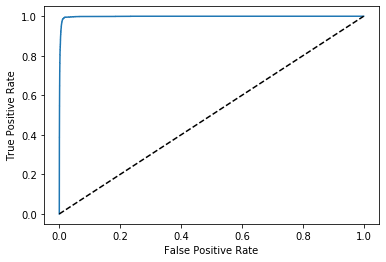


----------------- ROC AUC Score -----------------------------------
ROC AUC Score :  0.9981


In [198]:
# Evaluation Matrix
#get_evaluation_matrices(test_y, arr_y_pred_gb, arr_y_pred_proba_def_gb)
get_evaluation_matrices(labels_test_y, pred_labels, pred_probs)

### Misc